# Compare Tensorflow Hub style generating with CNN 

In the [previous application](https://github.com/Yingfu46/Python-Convolutional-Neural-Network-Transfer-Learning-Art-generating), we tested the original CNN style generaing with transfer learning from VGG19. We compare it with Tensorflow Hub.

In [ ]:
import scipy.io
import scipy.misc
import numpy as np
from skimage.io import imread, imsave

from skimage.transform import resize as imresize
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow


Use my own image for test.

In [ ]:
testimage = imread(f'drive/MyDrive/Proj1Art/Yingfu Porträtt.JPG')

In [ ]:
content_image = imresize(testimage, (500, int(500*0.618),3)).astype('float32')
content_image = np.reshape(content_image, (1,500, int(500*0.618),3 ))

Download the style image from Wikipedia.

In [ ]:
import sys
try:
  from download import download
except ImportError:
  !pip3 install download
  from download import download

# download Munch's Scream (Skrik) as the style image
download(f'https://upload.wikimedia.org/wikipedia/commons/c/c5/Edvard_Munch%2C_1893%2C_The_Scream%2C_oil%2C_tempera_and_pastel_on_cardboard%2C_91_x_73_cm%2C_National_Gallery_of_Norway.jpg', f'scream.jpg') 



file_sizes: 100%|██████████████████████████| 11.4M/11.4M [00:00<00:00, 17.7MB/s]
Successfully downloaded file to scream.jpg


'scream.jpg'

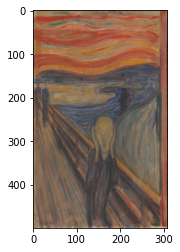

In [ ]:
style_image = imread('scream.jpg')
style_image = imresize(style_image, (500, int(500*0.618),3)).astype('float32')
style_image = np.reshape(style_image, (1, 500, int(500*0.618), 3))
imshow(style_image[0])

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]

In [ ]:
stylized_image.shape

TensorShape([1, 500, 312, 3])

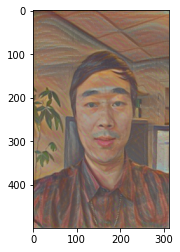

In [ ]:
imshow(stylized_image[0])

In [ ]:
imsave('drive/MyDrive/Proj1Art/Scream_tf_Hub.jpg', ((stylized_image[0].numpy())*255).astype('uint8'))

# Conslusion

It seems that tensorflow Hub keeps the most of the content image and adapts too little to the style image. 

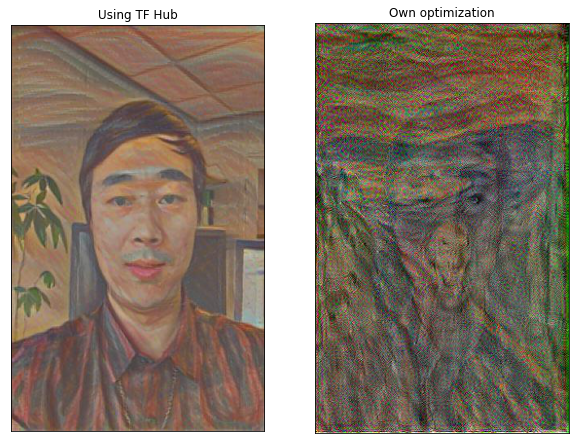

In [ ]:
plt.rcParams['figure.figsize'] = (10, 20)

axes = plt.subplots(1,2)[1].ravel()

axes[0].imshow(imread('drive/MyDrive/Proj1Art/Scream_tf_Hub.jpg'))
axes[0].set_title("Using TF Hub")
axes[0].set_xticks([])
axes[0].set_yticks([])


axes[1].imshow(imread('drive/MyDrive/Proj1Art/Scream/image_1000.jpg'))
axes[1].set_title("Own optimization")
axes[1].set_xticks([])
axes[1].set_yticks([])

plt.show()

